In [20]:
%matplotlib inline

from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time

In [2]:
# setup security 
access_token = '54004923-zfKkBI44WieJcsdOKmRaAlDwTC6qjpK9uU9CNsuSA'
access_token_secret = 'KGcZxw4ZCzZb3SwPhTA8QaxY5GzD4aAGTCBeXFqxiKWVs'
consumer_key = '9tuVBTnXD0mavJNoV1Jx7zzQN'
consumer_secret = 'Z1sAS2Jk8fRXs04nUImVEGooQ3vfiMIPewA6UQNVyM5Vk1yIwI'

# setup file store
file = 'C:/Users/Helton/Documents/PUC/RIWRS/tweets-sample.json'

In [3]:
class MyListener(StreamListener):
        
    
    def __init__(self, file):
        global the_file
        self.the_file = open(file, 'w')
        
    def on_data(self, data):
        self.the_file.write(data)
        return True
    
    def on_error(self, status):
        print(status)
        
    def file_close(self):
        self.the_file.close()

In [41]:
listener = MyListener(file)
oauth = OAuthHandler(consumer_key, consumer_secret)
oauth.set_access_token(access_token, access_token_secret)

max_time = 120 # in seconds
start_time = time.time() 

## collecting...
stream = Stream(oauth, listener)
#stream.filter(track=['copa', 'neymar', 'messi'],async=True,languages=['pt'])
stream.filter(track=['E3 2018', 'Assassins Creed', 'The Last Of Us', 'Fallout 76', 'Devil May Cry'],async=True)

elapsed_time = (time.time() - start_time)
while  elapsed_time < max_time:
    elapsed_time = (time.time() - start_time)

    
print('**Finish**')
stream.disconnect()
listener.file_close()

**Finish**


In [42]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
tweets_data = []
tweets_file = open(file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [44]:
tweets = pd.DataFrame()

tweets['lang'] = ''
tweets['text'] = ''
tweets['country'] = ''
for tweet in tweets_data:
    if 'lang' in tweet:
        tweets.loc[len(tweets)] = [tweet['lang'],
                               tweet['text'],
                               tweet['place']['country'] if tweet['place'] != None else None]
    
print(tweets.head(10))

  lang                                               text country
0   ja  RT @V_Jump: 「i☆Ris 4th Live Tour 2018～WONDERFU...    None
1   en  @JVCom Dying Light 2\nMetro Exodus\nFallout 76...    None
2   ja  RT @802Palette: 今夜の #FM802 #ハチパレ は\n🎉2010年代アニメ...    None
3   ja                    夢の話をしよう https://t.co/ZbIOyqrsOv    None
4   ja  大ヒットオーディション番組『ル・ポールのドラァグ・レース』シーズン11へ更新 – ニュース ...    None
5   ja  珠理奈、初女王の誓い「まだ私たちが戦わないところがある。卒業…しません」 https://t...    None
6   ja  【超WSTV裏実況】アルゼンチン代表vsアイスランド代表～個の力で勝るアルゼンチンを組織のア...    None
7   es  RT @nintenbit: Las penas, dicen, mejor en comp...    None
8   en  RT @theGRADvocate: This is important. https://...    None
9   ja  珠理奈、初女王の誓い「まだ私たちが戦わないところがある。卒業…しません」 https://t...    None


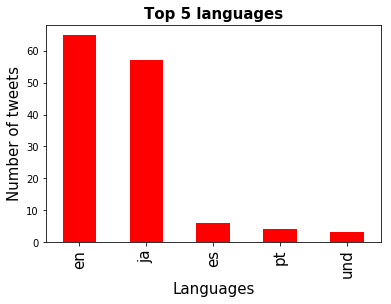

In [45]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

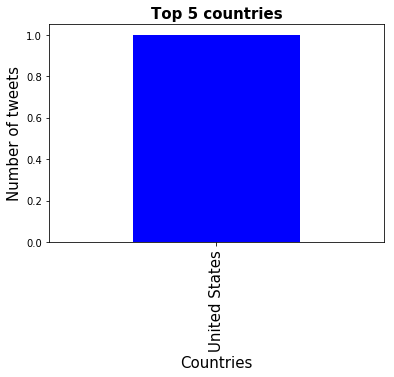

In [46]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [47]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [49]:
## filtrando aqueles q mais foram falados (termos mais influentes)
players = []
for tweet in tweets_data:
    if 'text' in tweet:
        if word_in_text('E3 2018', tweet['text']):
            players.append('E3 2018')
        elif word_in_text('Assassins Creed', tweet['text']):
            players.append('Assassins Creed')
        elif word_in_text('The Last Of Us', tweet['text']):
            players.append('The Last Of Us')
        elif word_in_text('Fallout 76', tweet['text']):
            players.append('Fallout 76')
        elif word_in_text('Devil May Cry', tweet['text']):
            players.append('Devil May Cry')
        else:
            players.append('None')
tweets['player'] = players
tweets.head(20)

,lang,text,country,player
0,ja,RT @V_Jump: 「i☆Ris 4th Live Tour 2018～WONDERFU...,None,None
1,en,@JVCom Dying Light 2\nMetro Exodus\nFallout 76...,None,Fallout 76
2,ja,RT @802Palette: 今夜の #FM802 #ハチパレ は\n🎉2010年代アニメ...,None,None
3,ja,夢の話をしよう https://t.co/ZbIOyqrsOv,None,None
4,ja,大ヒットオーディション番組『ル・ポールのドラァグ・レース』シーズン11へ更新 – ニュース ...,None,None
5,ja,珠理奈、初女王の誓い「まだ私たちが戦わないところがある。卒業…しません」 https://t...,None,None
6,ja,【超WSTV裏実況】アルゼンチン代表vsアイスランド代表～個の力で勝るアルゼンチンを組織のア...,None,None
7,es,"RT @nintenbit: Las penas, dicen, mejor en comp...",None,None
8,en,RT @theGRADvocate: This is important. https://...,None,None
9,ja,珠理奈、初女王の誓い「まだ私たちが戦わないところがある。卒業…しません」 https://t...,None,None


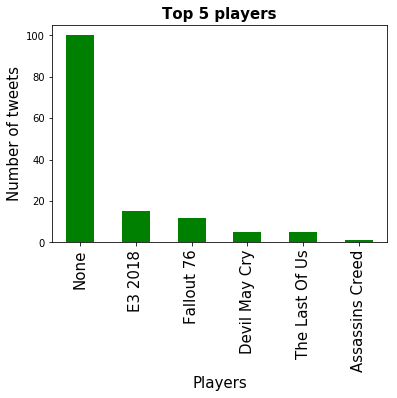

In [50]:
tweets_by_player = tweets['player'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Players', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 players', fontsize=15, fontweight='bold')
tweets_by_player[:6].plot(ax=ax, kind='bar', color='green')